<a href="https://colab.research.google.com/github/azhar2929/Capstone-project--EDA/blob/main/Capstone_Project_ML_Bike_Sharing_Demand_Prediction(Azhar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Azharuddin Hussain Mizra


# **Project Summary -**

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**
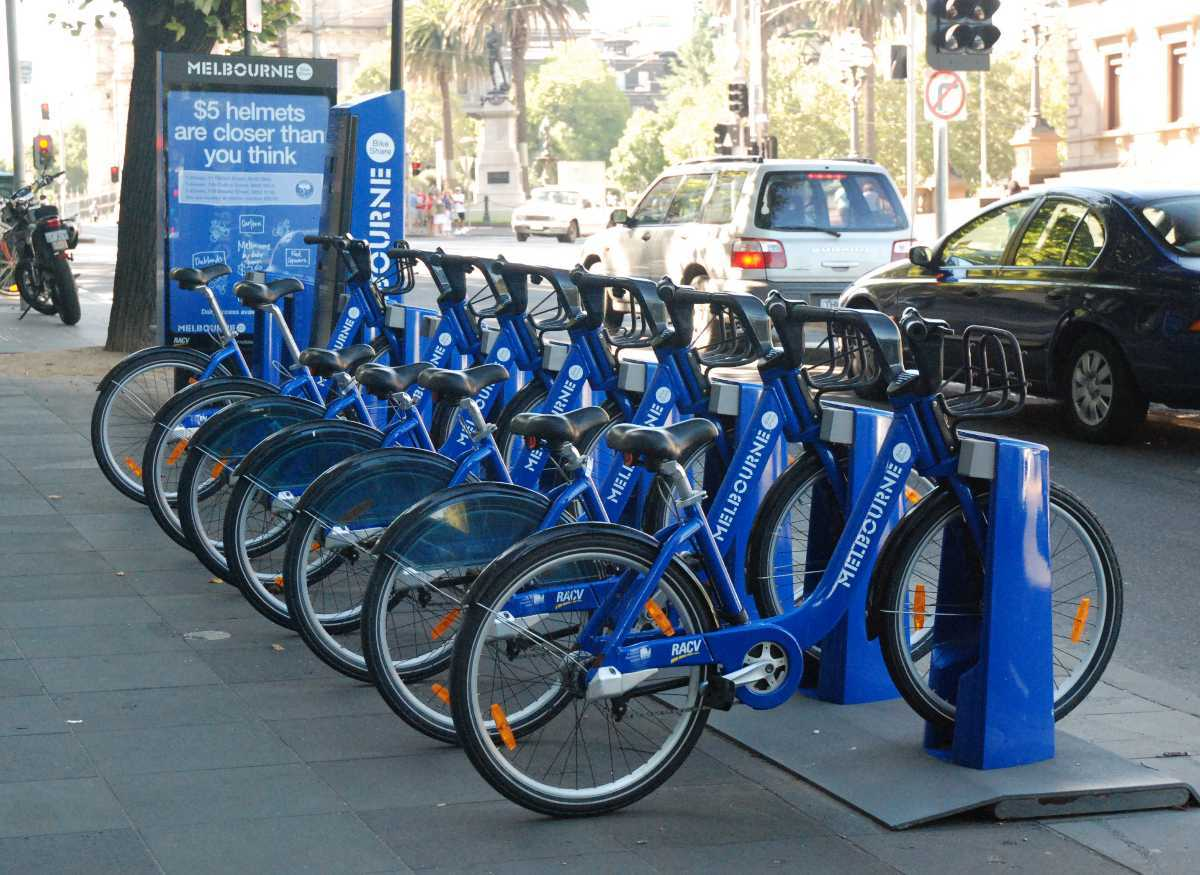

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load and read the seol bike data set from drive
bike_df = pd.read_csv('/content/drive/MyDrive/DATA/SeoulBikeData.csv',encoding='latin')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

value=len(bike_df[bike_df.duplicated()])
print(value)

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Visualizing the missing values
bike_df.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### What did you know about your dataset?

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Hour - Hour of he day
* ### Temperature-Temperature of the day
* ### Humidity - Humidity measure
* ### Windspeed - windspeed
* ### Visibility - visibility measure
* ### Dew point temperature - Dew point temperature measure
* ### Solar radiation - Solar radiation measure
* ### Rainfall - mm
* ### Snowfall - Snowfall measure
* ### Seasons - 4-Winter, 1-Spring, 2-Summer, 3-fall
* ### Holiday - When  holiday or not
* ### Functional Day - Wheather a functional day or not

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Getting all the columns
bike_df.columns



Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Variables Description

* ### Date : year-month-day
* ### Hour - Hour of he day
* ### Temperature-Temperature of the day
* ### Humidity - Humidity measure
* ### Windspeed - windspeed
* ### Visibility - visibility measure
* ### Dew point temperature - Dew point temperature measure
* ### Solar radiation - Solar radiation measure
* ### Rainfall - mm
* ### Snowfall - Snowfall measure
* ### Seasons - 4-Winter, 1-Spring, 2-Summer, 3-fall
* ### Holiday - When  holiday or not
* ### Functional Day - Wheather a functional day or not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df[col].unique())

In [ ]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday']
cat_unique_vals(categorical_columns,bike_df)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']


### What all manipulations have you done and insights you found?

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']


The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
**Bike Count By Seasons**

In [ ]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return bike_df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [ ]:
#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


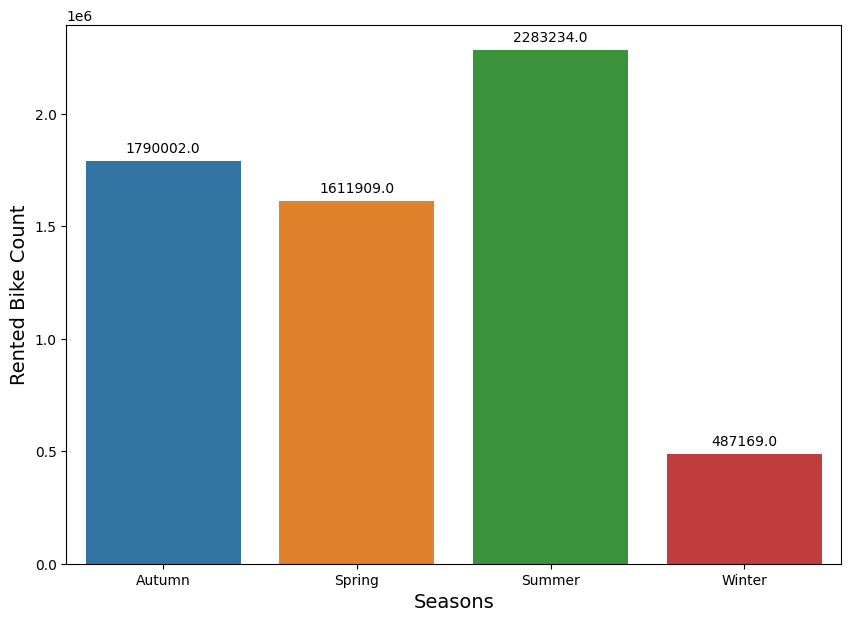

In [ ]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=seasons_col,x='Seasons',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

##### 1. Why did you pick the specific chart?

 To identify the no. of count of rented bike count by the seasons.

##### 2. What is/are the insight(s) found from the chart?

Every Seasons have different types of count.
Autumn -1790002
Spring - 1611909
Summer - 2283234
Winter - 487169

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Summer season gained insights help creating a positive business impact  whereas Winter season nsights that lead to negative growth.

#### Chart - 2
**Percentage of no of bikes rented**

In [ ]:
# Chart - 2 visualization code
#Initial preparations for plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented Bike Count'])
palette_color = sns.color_palette('bright')
explode = (0.05,0.05,0.05,0.05)

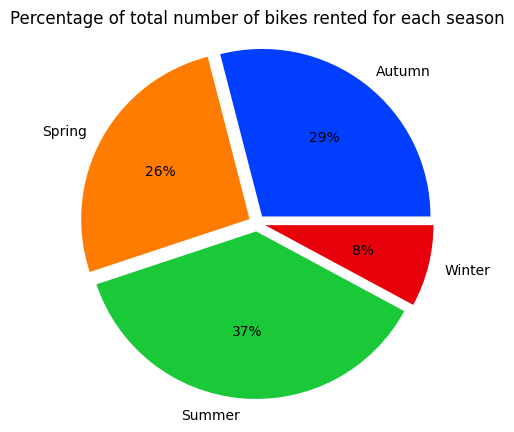

In [ ]:
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")
plt.show()

##### 1. Why did you pick the specific chart?

Showing percentage of total number of bikes rented for each season.

##### 2. What is/are the insight(s) found from the chart?

Showing each having percentage of bikes with seasons having max in summer and min in winter.
Summer - 37%
Autumn - 29%
Spring - 26%
Winter - 8%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Summer seasons consist of maximum no. of percentage which leads to creating a positive business impact  whereas  Winter seasons consist of minimum no. of percentage that lead to negative growth.

#### Chart - 3
**Bike count according to Holiday variable**

In [ ]:
# Chart - 3 visualization code
#Holidays column
holidays_col = create_df_analysis('Holiday')
holidays_col

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


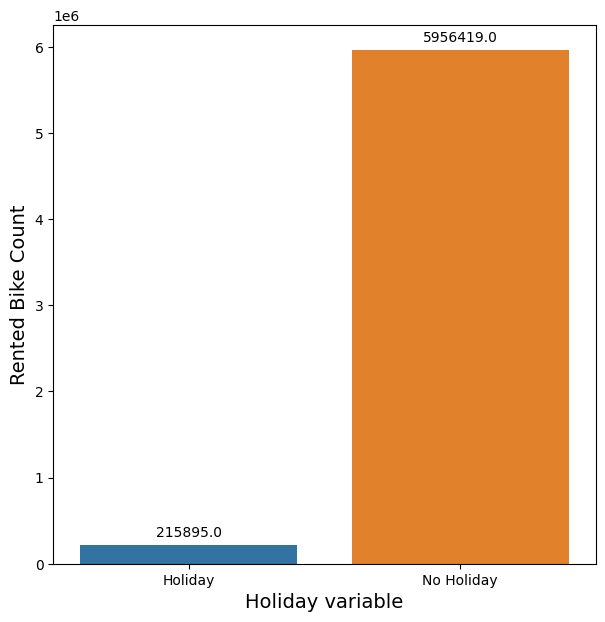

In [ ]:
#Creating a visualisation for the holidays dataframe
plt.figure(figsize=(7,7))
splot = sns.barplot(data=holidays_col,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

##### 1. Why did you pick the specific chart?

It shows the no of bike count according to the holiday variable.

##### 2. What is/are the insight(s) found from the chart?

In this chart we found that during holiday the rented bike count minimum and during no holiday the rented bike count maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As during no holiday the rented bike count create a positive business impact whereas during holiday the rented bike count create a negative impact.

#### Chart - 4
**Number of bikes rented for different temperatures**

In [ ]:
# Chart - 4 visualization code
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp_bike = create_df_analysis('Temperature(°C)')
temp_bike

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


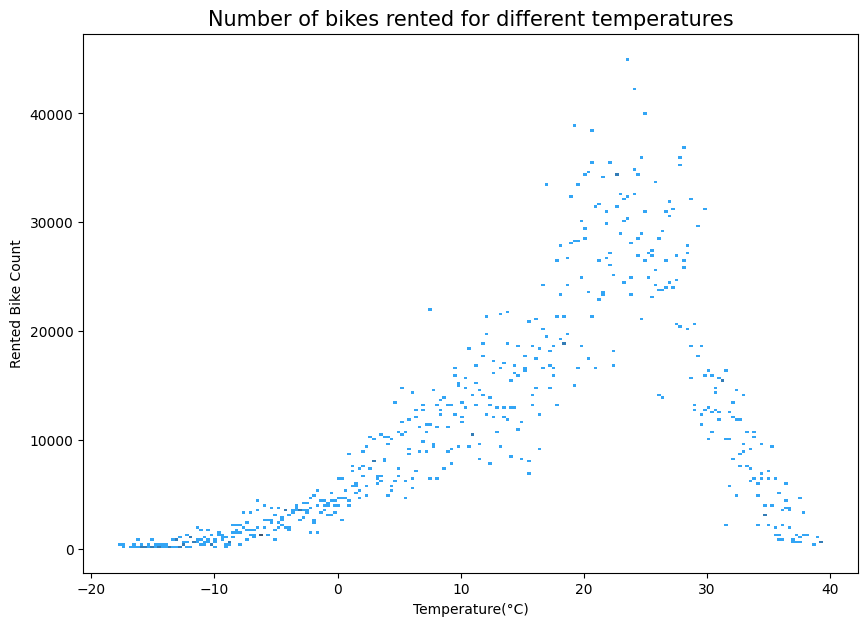

In [ ]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.histplot(data=temp_bike,x='Temperature(°C)',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

##### 1. Why did you pick the specific chart?

This chart specify Number of bikes rented for different temperatures .

##### 2. What is/are the insight(s) found from the chart?

We found from the chart that during temperature from 0 - 30 the no of counts of bike is more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

During Temperature between from 10 - 30 degree celcius the count of bike is maximum which leads to positive impact in the business whereas below 0 degree celcius and above 30 degree celcius the no of bikes lead to minimum as it leads to negative growth in bussiness.

#### Chart - 5
**During different snowfall intensities in cm**

In [ ]:
# Chart - 5 visualization code
#Creating a dataframe to analyse the number of bikes rented for different intensities of snowfall
snowfall_bike = create_df_analysis('Snowfall (cm)')
snowfall_bike.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


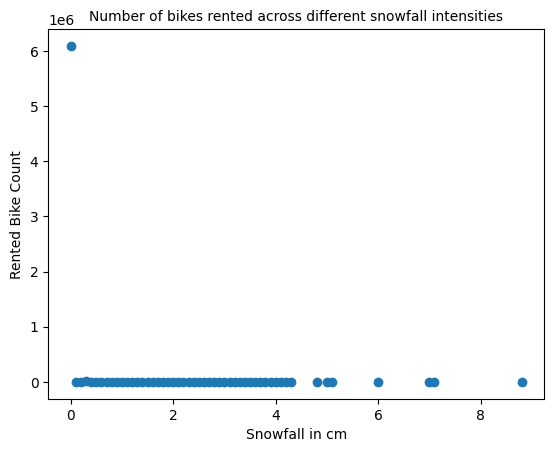

In [ ]:
#Creating a visualisation for different snowfall intensities
plt.scatter(data=snowfall_bike,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different snowfall intensities',size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the number of bikes rented across different snowfall intensities.

##### 2. What is/are the insight(s) found from the chart?

We can see here that most of the bikes are rented when there is snowfall at all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The y axis in both the case is of the order 10 to the power 6, therefore the lower values are not too distinctive as We can see here that most of the bikes are rented when there is snowfall at all. A similar result is seen for snowfall too, i.e the most number of bikes are rented when there is snowfall.  

#### Chart - 6
**During different Rainfall intensities in mm**

In [ ]:
# Chart - 6 visualization code
#Creating a dataframe to analyse the number of bikes rented for different intensities of rainfall
rainfall_bike = create_df_analysis('Rainfall(mm)')
rainfall_bike.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


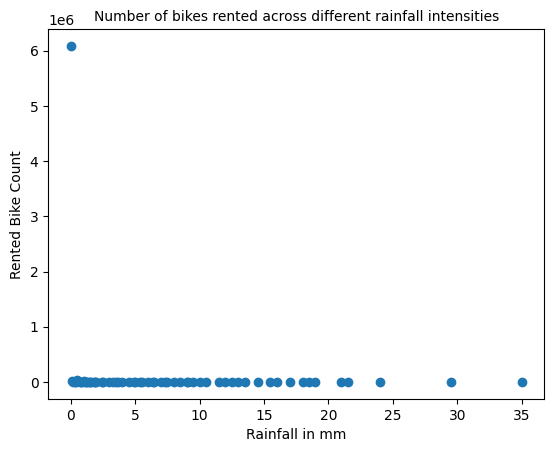

In [ ]:
#Creating a visualisation for different rainfall intensities
plt.scatter(data=rainfall_bike,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows Number of bikes rented across different rainfall intensities.

##### 2. What is/are the insight(s) found from the chart?

We can see here that most of the bikes are rented when there is no snowfall at all. A similar result is seen for rainfall too, i.e the most number of bikes are rented when there is no rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see here that most of the bikes are rented when there is no snowfall at all. A similar result is seen for rainfall too, i.e the most number of bikes are rented when there is no rainfall.  

Note:The y axis in both the case is of the order 10 to the power 6, therefore the lower values are not too distinctive

#### Chart - 7
**Bikes rented across different humidity**

In [ ]:
# Chart - 7 visualization code
#Creating a dataframe for analysing the number of bikes rented for different humidity percentages.
humidity_bike = create_df_analysis('Humidity(%)')
humidity_bike

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


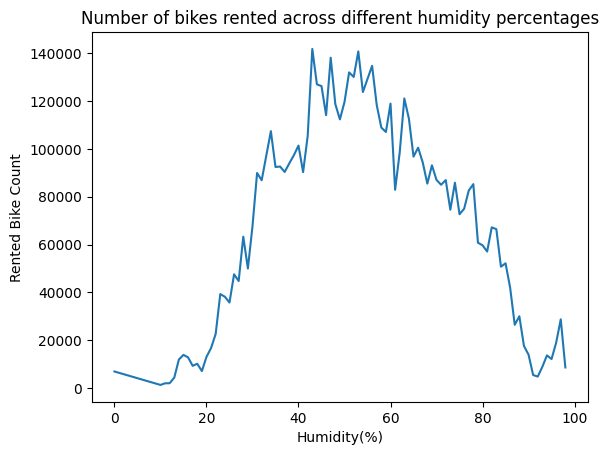

In [ ]:
#Plotting a visualisation for the different humidity percentages
plt.plot(humidity_bike['Humidity(%)'],humidity_bike['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows Number of bikes rented across different humidity percentages.

##### 2. What is/are the insight(s) found from the chart?

In this chart we found that during 40 - 60 humidity (%) is maximum with rented bike count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that the majority of the bikes are rented for a humidity percentage range of 30 to 70 lead to poistive bussiness impact.

#### Chart - 8
**Bikes rented across different hours.**

In [ ]:
# Chart - 8 visualization code
#Creating a dataframe to analyse the number of bikes rented for different hours of the day
hour_df = create_df_analysis("Hour")
hour_df

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


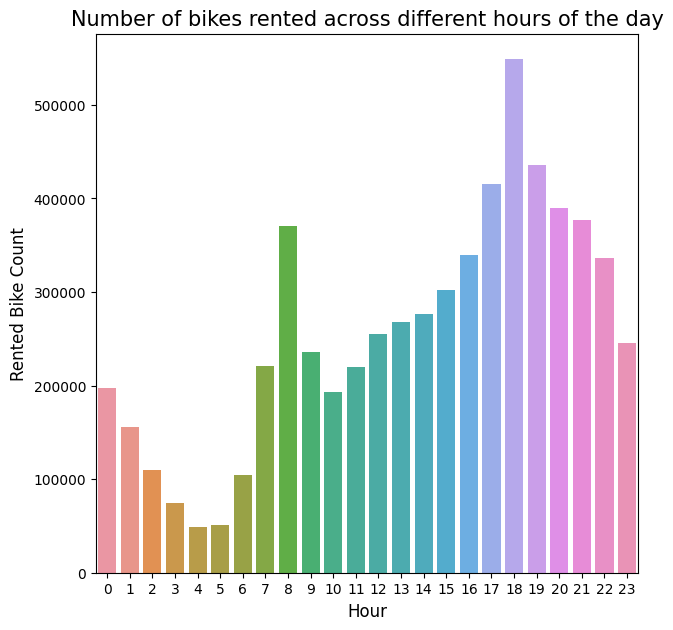

In [ ]:
#Creating a visualisation for different hours of the day
plt.figure(figsize=(7,7))
sns.barplot(data=hour_df,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=15)
plt.xlabel('Hour',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

This shows Number of bikes rented across different hours of the day.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that the highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here we can see that the highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am as in this time period it lead to positive business impact where as in the other hours leads to neagtive growth.

#### Chart - 9
**Bikes rented for different visibility**

In [ ]:
# Chart - 9 visualization code
#Creating a dataframe to analyse the number of bikes rented for different visibility rates
visibility_bike = create_df_analysis('Visibility (10m)')
visibility_bike

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


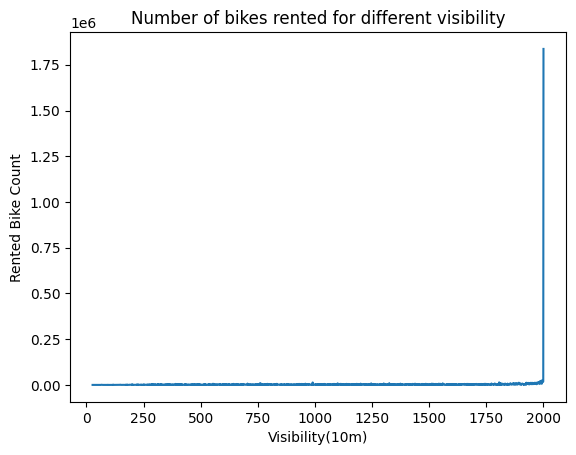

In [ ]:
#Creating a visualisation for number of bikes rented in different visibility ranges
plt.plot(visibility_bike['Visibility (10m)'],visibility_bike['Rented Bike Count'])
plt.xlabel('Visibility(10m)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bikes rented for different visibility')
plt.show()

##### 1. Why did you pick the specific chart?

This chart specify Number of bikes rented for different visibility .

##### 2. What is/are the insight(s) found from the chart?

We can see that higher visibility is preffered by the customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Through further analysis of the visibility_bike dataframe we can see that for increasing visibility there is an increase in bikes rented this insights leads to a positve business impact .

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bike_df.describe().columns)-{'Rented Bike Count','Hour'})
possible_outlier_cols

['Wind speed (m/s)',
 'Snowfall (cm)',
 'Visibility (10m)',
 'Temperature(°C)',
 'Rainfall(mm)',
 'Humidity(%)',
 'Solar Radiation (MJ/m2)',
 'Dew point temperature(°C)']

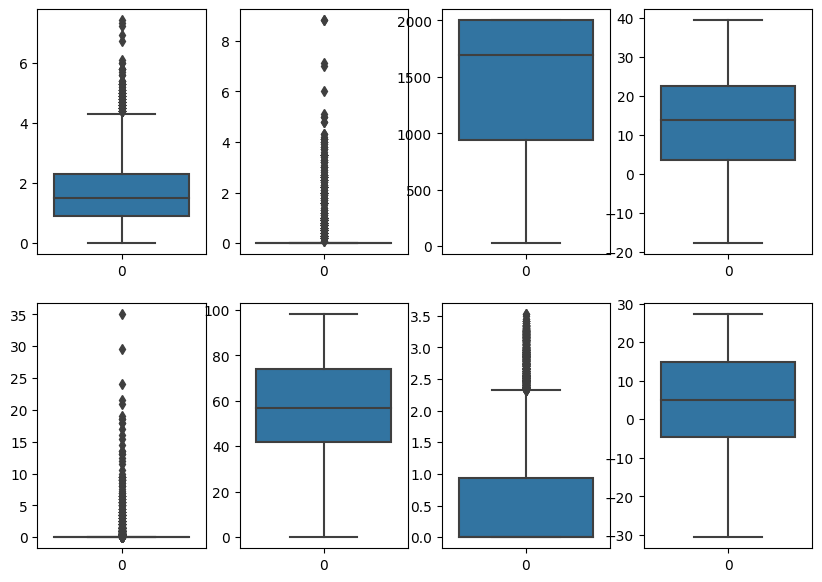

In [ ]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_cols):
  plt.subplot(2,4,index+1)
  sns.boxplot(bike_df[item])

##### 1. Why did you pick the specific chart?

This chart specify the outliers .

##### 2. What is/are the insight(s) found from the chart?

Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

outlier shows Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation for positive business impact.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

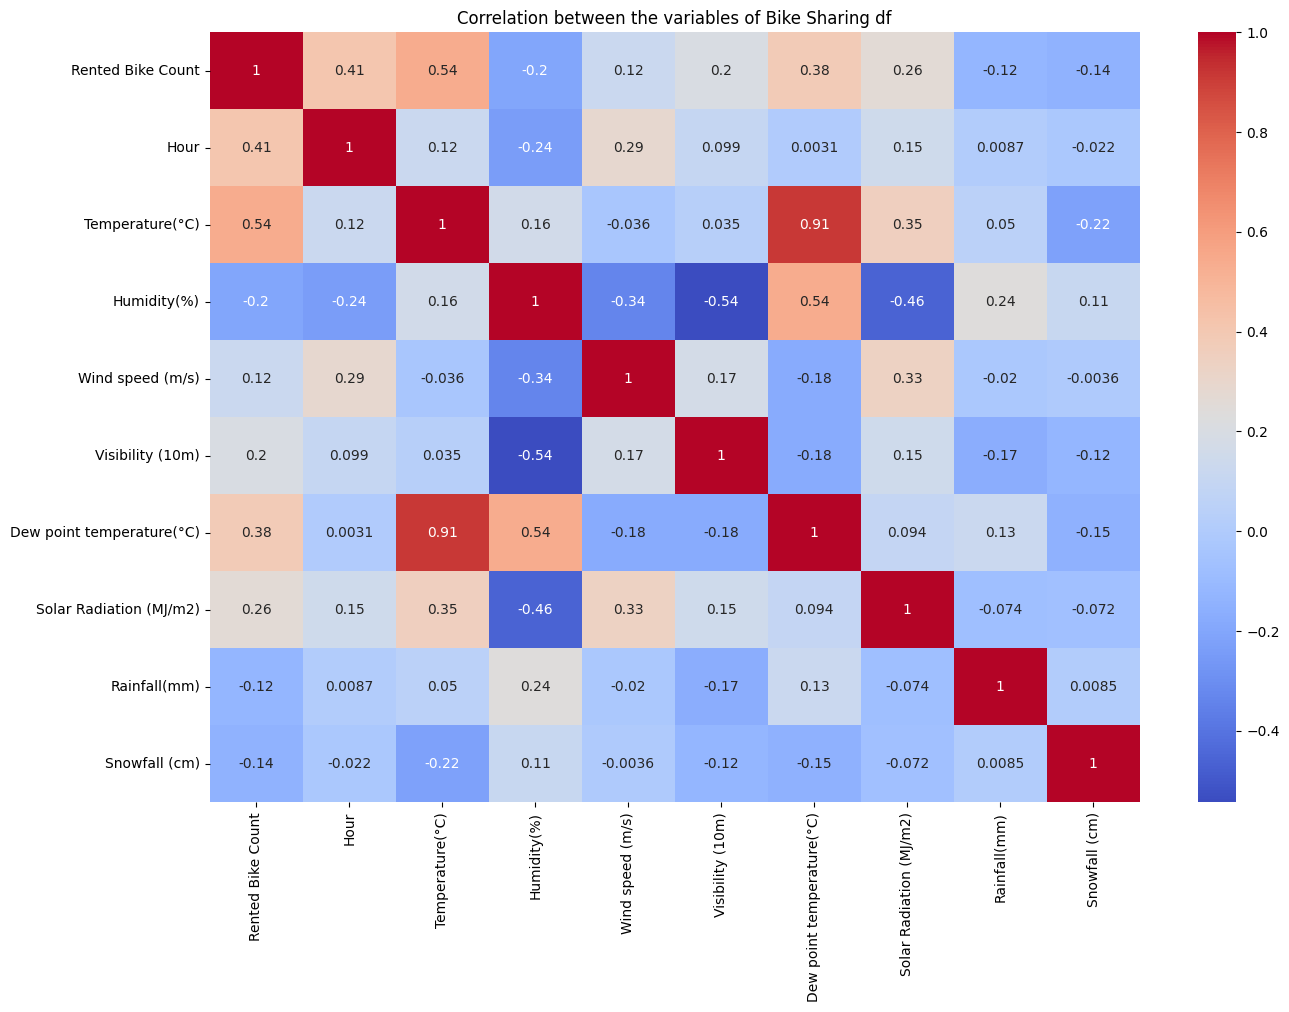

In [ ]:
# Correlation Heatmap visualization code
#Plotting correlation matrix using sns.heatmap
corr_matrix = bike_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

##### 1. Why did you pick the specific chart?

This chart specify Correlation between the variables of Bike Sharing.

##### 2. What is/are the insight(s) found from the chart?

The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no significant relationship between the independent variables (features like weather, temperature, etc.) and the bike sharing demand. In other words, the predictors have no effect on predicting bike rental demand.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Alternative Hypothesis (H1):
There is a significant relationship between the independent variables and the bike sharing demand. The predictors have a meaningful impact on predicting bike rental demand, and the model will demonstrate predictive capability.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [ ]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_df[outlier_cols].quantile(0.25)
Q3 = bike_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [ ]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [ ]:
#Detecting and removing the outliers
bike_df[outlier_cols] = bike_df[outlier_cols][~((bike_df[outlier_cols] < l_fence) | (bike_df[outlier_cols] > u_fence))]
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##### What all outlier treatment techniques have you used and why did you use those techniques?

Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.

Note: Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
def impute_null(outlier_cols):
  for col in outlier_cols:
    bike_df[col].fillna(bike_df[col].median(),inplace=True)

impute_null(outlier_cols)

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### What all categorical encoding techniques have you used & why did you use those techniques?

The imputation is successful and therefore we have handled the outliers successfully

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#Creating the dataset for independent and dependent variables
X = bike_df.drop(columns={'Rented Bike Count'},axis=1)
Y = bike_df['Rented Bike Count']

In [ ]:
#First look of the independent variable dataset
X.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#First look of the dependent variable dataset
Y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from datetime import datetime




In [ ]:
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
#Shape of the train set of the independent values
X_train.shape

(6570, 13)

In [ ]:
# Identify and drop columns with non-numeric values
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns
X_train = X_train.drop(columns=non_numeric_columns)
X_test = X_test.drop(columns=non_numeric_columns)

# Standardize the remaining numeric columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Scaling your data
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [ ]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.59807804,
         0.        ,  0.        ],
       [ 0.36544652,  0.93615918, -0.54181953, ..., -0.59807804,
         0.        ,  0.        ],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.59807804,
         0.        ,  0.        ],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.59807804,
         0.        ,  0.        ],
       [-1.66021162, -0.37401835,  0.04777967, ..., -0.59807804,
         0.        ,  0.        ],
       [ 1.23358573, -0.47415931,  1.22697808, ..., -0.59807804,
         0.        ,  0.        ]])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
#Shape of the train set of the independent values
X_train.shape

(6570, 13)

In [ ]:
#Shape of the test set of the independent values
X_test.shape

(2190, 13)

##### What data splitting ratio have you used and why?

For testing the datasets.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1
### <b>Linear regression:</b>
As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [ ]:
# ML Model - 1 Implementation
#Training the linear regression model
lr_model = LinearRegression().fit(X_train,Y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#Checking the score of the linear regression model
lr_model.score(X_train,Y_train)

0.45923670289368845

In [ ]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 189.76031941,  111.67484956, -224.47533538,    8.40730607,
         29.27675394,  270.88085135,    2.07618998,    0.        ,
          0.        ])

In [ ]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

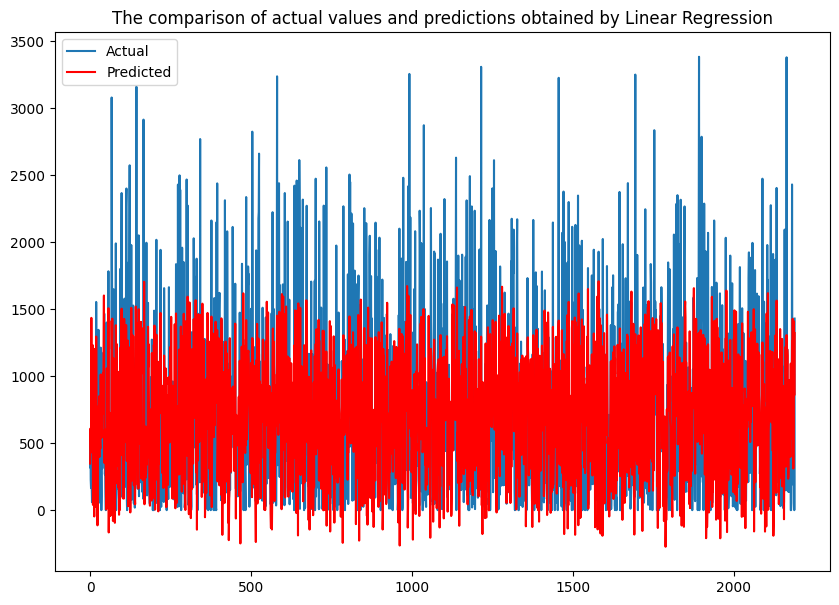

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [ ]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(Y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [ ]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 232441.92613318292
RMSE : 482.12231449413633
R2 : 0.44273196995352093
Adjusted R2 : 0.4404313221230538


##### Which hyperparameter optimization technique have you used and why?

linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


The evaluation metrics for Linear Regression are given as:
MSE : 232441.92613318292
RMSE : 482.12231449413633
R2 : 0.44273196995352093
Adjusted R2 : 0.4404313221230538


### ML Model - 2
### <b>Ridge Regression:</b>
Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,Y_train)



GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 35}

Using {'alpha': 35} as the value for aplha gives us a negative mean squared error of: -225070.63703176612


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=35).fit(X_train,Y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

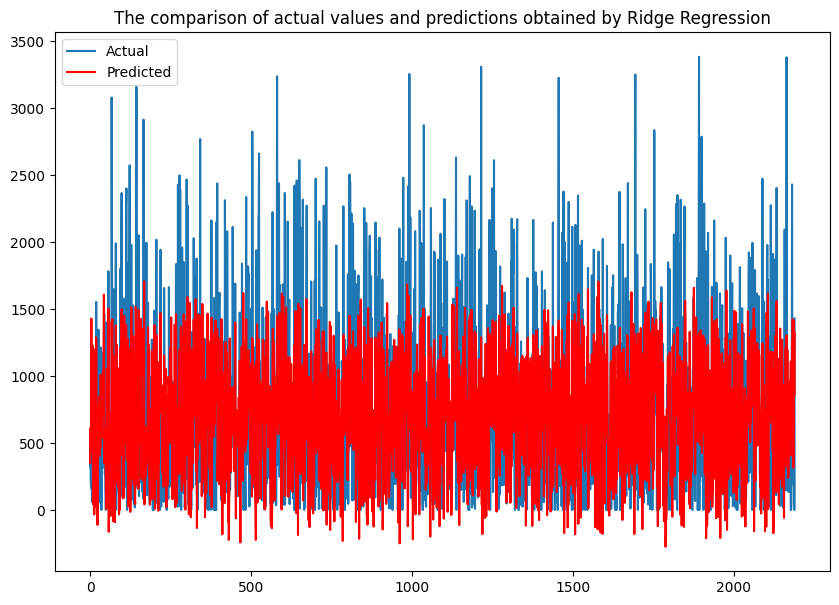

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

In [ ]:
#Calculating the evaluation metrics for Ridge Regression
eval_metrics(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 232522.94219838898
RMSE : 482.20632741430194
R2 : 0.44253773794120477
Adjusted R2 : 0.44023628823545735


##### Which hyperparameter optimization technique have you used and why?

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics for Ridge Regression are given as:
MSE : 232522.94219838898
RMSE : 482.20632741430194
R2 : 0.44253773794120477
Adjusted R2 : 0.44023628823545735

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


As we can see there is only a very slight difference between the results achieved through Linear regression and Ridge regression.

### ML Model - 3
### <b>Lasso Regression:</b>
Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [ ]:
# ML Model - 3 Implementation

#Creating a Lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {lasso_model_grid.best_params_}')
print(f'\nUsing {lasso_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 0.8}

Using {'alpha': 0.8} as the value for aplha gives us a negative mean squared error of: -225276.8821389685


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.8).fit(X_train,Y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

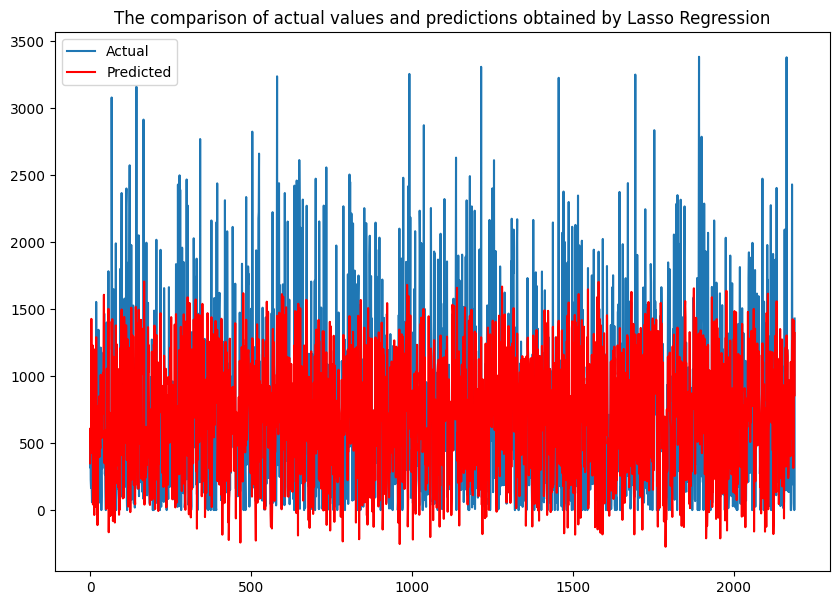

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')

In [ ]:
#Calculating the evaluation metrics for Lasso Regression
eval_metrics(Y_test_pred_lasso,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 232480.6517578953
RMSE : 482.1624744397839
R2 : 0.4426391271821897
Adjusted R2 : 0.4403380960558776


##### Which hyperparameter optimization technique have you used and why?

Lasso regression analysis is a shrinkage and variable selection method for linear regression models

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics for Lasso Regression are given as:
MSE : 232480.6517578953
RMSE : 482.1624744397839
R2 : 0.4426391271821897
Adjusted R2 : 0.4403380960558776

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. EDA insights:
  * Most number of bikes are rented in the Summer season and the lowest in the winter season.
  * Over 96% of the bikes are rented on days that are considered as No Holiday.
  * Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.
  * Most number of bikes are rented when there is no snowfall or rainfall.
  * Majority of the bikes are rented for a humidity percentage range of 30 to 70.
  * The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.
  * Most of the bike rentals have been made when there is high visibility.

2. Results from ML models:
  * Linear Regression is the best performing model with an r2 score of 0.453074.
  * Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4264.
  * Actual vs Prediction visualisation is done for all the 3 models.
  * All 3 models have been explained with the help of SHAP library.
  * Temperature and Hour are the two most important factors according to all the models.

3. Challenges faced:
  * Removing Outliers.
  * Encoding the categorical columns.
  * Removing Multicollinearity from the dataset.
  * Choosing Model explainability technique.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***